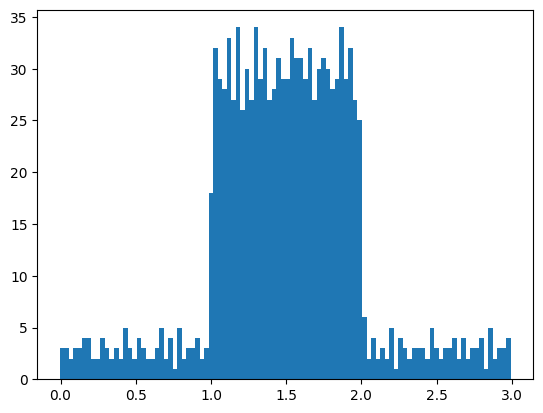

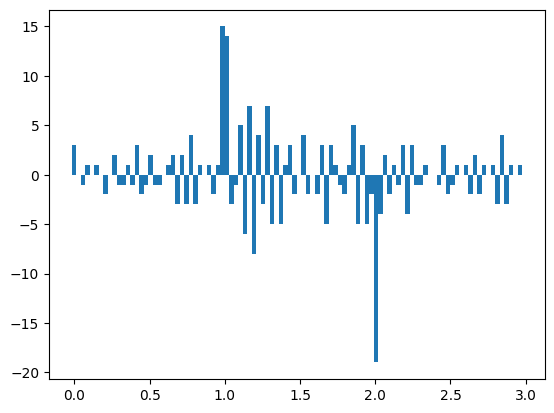

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(0, 1, 100)
b = np.linspace(1, 2, 1000)
c = np.linspace(2, 3, 100)

# Agregar ruido a la distribución
ruido_a = np.random.normal(0, 0.01, a.shape)
ruido_b = np.random.normal(0, 0.01, b.shape)
ruido_c = np.random.normal(0, 0.01, c.shape)

a += ruido_a
b += ruido_b
c += ruido_c

distribucion = np.concatenate((a, b, c))
del a, b, c

plt.figure()
plt.hist(distribucion, bins=100)
plt.show()

counts, edges = np.histogram(distribucion, bins=100)

counts = np.insert(counts, 0, 0)
derivada_counts = np.diff(counts)


plt.figure()
plt.bar(edges[:-1], derivada_counts, width=np.diff(edges))
plt.show()

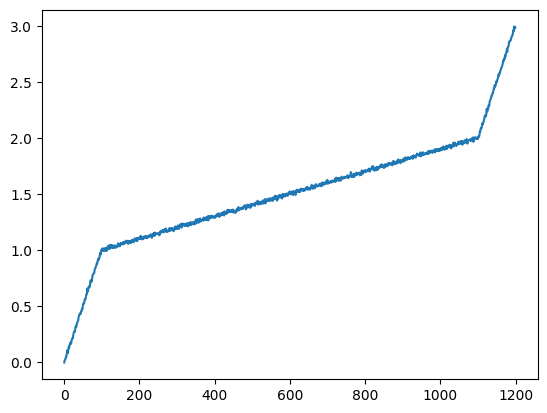

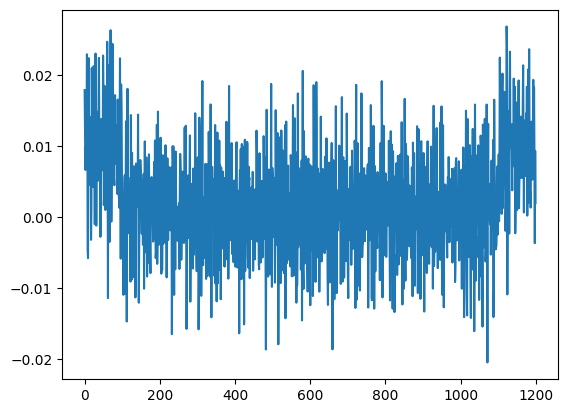

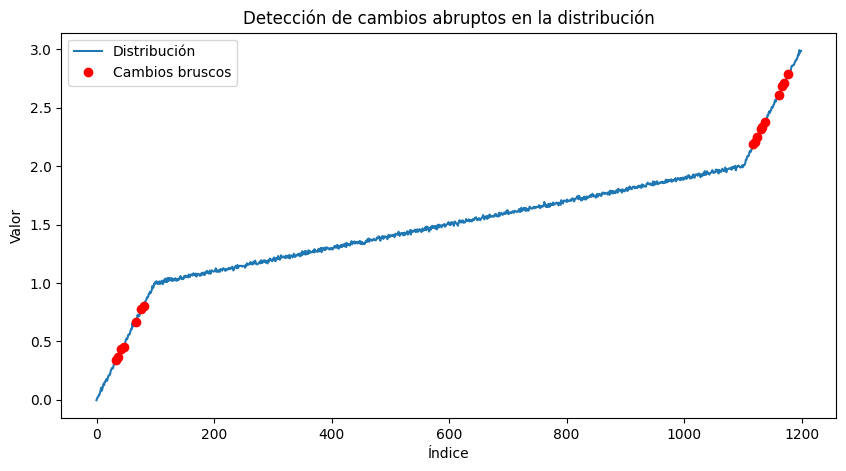

In [4]:
import numpy as np
from scipy.signal import savgol_filter, find_peaks
import matplotlib.pyplot as plt

# Suponiendo que 'distribucion' es tu array de datos
# Calcular la derivada (diferencia entre puntos)
plt.figure()
plt.plot(distribucion)
plt.show()

gradiente = np.gradient(distribucion)

plt.figure()
plt.plot(gradiente)
plt.show()

# Suavizar la derivada para reducir el impacto del ruido
gradiente_suave = savgol_filter(gradiente, window_length=51, polyorder=3)

# Definir un umbral para detectar picos: por ejemplo, tomando un percentil alto
umbral = np.percentile(np.abs(gradiente_suave), 95)

# Detectar picos en la magnitud del gradiente
picos, _ = find_peaks(np.abs(gradiente_suave), height=umbral)

# Graficar para visualizar
plt.figure(figsize=(10, 5))
plt.plot(distribucion, label="Distribución")
plt.plot(picos, distribucion[picos], "ro", label="Cambios bruscos")
plt.legend()
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Detección de cambios abruptos en la distribución")
plt.show()


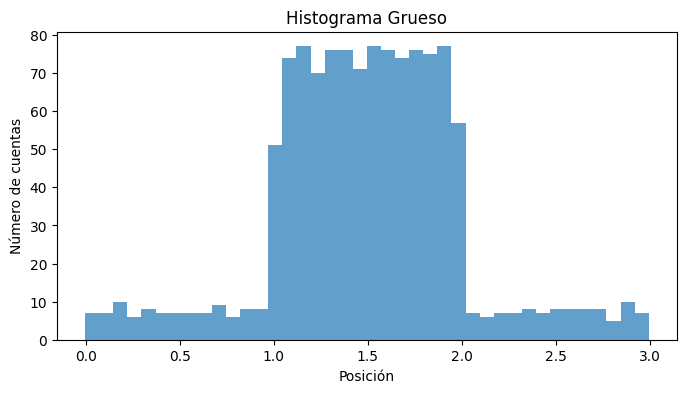

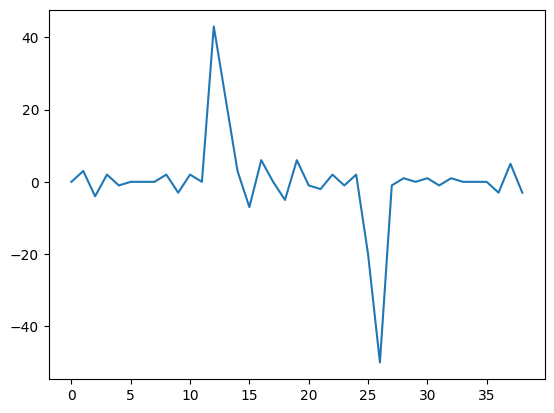

Picos detectados (índices de bin): [12 26]
Posiciones aproximadas de la interfaz: [0.89507968 1.94421378]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Supongamos que 'data' es tu array con las posiciones (o el valor de interés) de las partículas
# Por ejemplo, podrías tener:
data = np.concatenate([
    np.random.normal(loc=0.5, scale=0.1, size=10000),  # zona de alta densidad (cerca del tubo)
    np.random.normal(loc=2.0, scale=0.1, size=5000)      # zona de baja densidad (fuera del tubo)
])

data = distribucion

# Crear histograma grueso
num_bins_coarse = 40  # cantidad de bins para la visión global
counts, bin_edges = np.histogram(data, bins=num_bins_coarse)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Graficar histograma grueso
plt.figure(figsize=(8,4))
plt.bar(bin_centers, counts, width=(bin_edges[1]-bin_edges[0]), alpha=0.7)
plt.title("Histograma Grueso")
plt.xlabel("Posición")
plt.ylabel("Número de cuentas")
plt.show()

# Calcular la diferencia entre bins para detectar cambios bruscos
diff_counts = np.diff(counts)

plt.figure()
plt.plot(diff_counts)
plt.show()

# Usar find_peaks para identificar picos en la variación (cambiar el umbral según tu necesidad)
umbral = np.percentile(np.abs(diff_counts), 90)
picos, _ = find_peaks(np.abs(diff_counts), height=umbral)

print("Picos detectados (índices de bin):", picos)
# Aproximar la posición de la interfaz usando los bordes del histograma
interface_aproximadas = bin_edges[picos]
print("Posiciones aproximadas de la interfaz:", interface_aproximadas)
